# Проект: Дашборд медицинских данных

## 1. Описание

**Данные:** ежегодный отчет главного онколога РФ опубликованного за 2021 год (таблица №54, 57-85). Это сведения о проведенном лечении больных  опухолями различных локализаций, о использовании различных методик лечения, а также сведения о лечении пациентов в различных  возрастных группах.

**Цель:** визуализировать показатели для различных регионов России и построить интерактивный дашборд на основе этих данных

**Ссылка на дашборд:** https://datalens.yandex/p250jae9stuge

## 2. Подготовка данных

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
#подготовим необходимые списки для категоризации данных
code=['(С00)', '(C01-09)', '(С10-13)', '(С15)', '(С16)', '(С18)', '(С19-21)', '(С22)', '(С25)', '(С32)', '(С33,34)', '(С40,41)', '(С43)', '(С44)', '(С47,49)', '(С50)', '(С53)', '(С54)', '(С56)', '(С61)', '(С64)', '(С67)', '(С73)', '(С81-86;88,90,96)', '(С91-95)']
localization=['Губа', 'Полость рта', 'Глотка', 'Пищевод', 'Желудок', 'Ободочная кишка', 'Прямая кишка, ректосиг. соединение, анус', 'Печень и внутрипеченочные желчные протоки', 'Поджелудочная железа', 'Гортань', 'Трахея, бронхи, легкое', 'Кости и суставные хрящи', 'Меланома кожи', 'Кожа (кроме меланомы)', 'Соединительная и другие мягкие ткани', 'Молочная железа', 'Шейка матки', 'Тело матки', 'Яичник', 'Предстательная железа', 'Почка', 'Мочевой пузырь', 'Щитовидная железа', 'Злокачественные лимфомы', 'Лейкемии']

central = ['Белгородская область', 'Брянская область', 'Владимирская область', 'Воронежская область', 'Ивановская область', 'Тверская область', 'Калужская область', 'Костромская область', 'Курская область', 'Липецкая область', 'г. Москва', 'Московская область', 'Орловская область', 'Рязанская область', 'Смоленская область', 'Тамбовская область', 'Тульская область', 'Ярославская область']
n_w = ['Ненецкий а.о.', 'Архангельская обл.(б/а.о)', 'Вологодская область', 'Калининградская область', 'г. Санкт-Петербург', 'Ленинградская область', 'Мурманская область', 'Новгородская область', 'Псковская область', 'Республика Карелия', 'Республика Коми']
south = ['Краснодарский край', 'Астраханская область', 'Волгоградская область', 'Ростовская область', 'Республика Адыгея', 'Республика Калмыкия', 'Республика Крым', 'Город Cевастополь']
n_cauc = ['Ставропольский край', 'Республика Ингушетия', 'Республика Дагестан', 'Респ. Кабардино-Балкария', 'Респ. Северная Осетия', 'Респ. Карачаево-Черкесия', 'Республика Чечня']
privol = ['Нижегородская область', 'Кировская область', 'Самарская область', 'Оренбургская область', 'Пензенская область', 'Пермский край', 'Саратовская область', 'Ульяновская область', 'Республика Башкортостан', 'Республика Марий Эл', 'Республика Мордовия', 'Республика Татарстан', 'Республика Удмуртия', 'Республика Чувашия']
ural = ['Ханты-Мансийский а.о.', 'Ямало-Ненецкий а.о.', 'Курганская область', 'Свердловская область', 'Тюменская обл.(б/а.о)', 'Челябинская область']
sibir = ['Алтайский край', 'Красноярский край', 'Иркутская область', 'Кемеровская область', 'Новосибирская область', 'Омская область', 'Томская область', 'Республика Алтай', 'Республика Тыва', 'Республика Хакасия']
fareast = ['Приморский край', 'Хабаровский край', 'Амурская область', 'Камчатский край', 'Магаданская область', 'Сахалинская область', 'Забайкальский край', 'Чукотский авт.округ', 'Республика Бурятия', 'Республика Саха (Якутия)', 'Еврейская авт. обл.']
dist = ['РОССИЯ', 'ЦЕНТРАЛЬНЫЙ ФО', 'СЕВЕРО-ЗАПАДНЫЙ ФО', 'ЮЖНЫЙ ФО', 'СЕВЕРО-КАВКАЗСКИЙ ФО', 'ПРИВОЛЖСКИЙ ФО', 'УРАЛЬСКИЙ ФО', 'СИБИРСКИЙ ФО', 'ДАЛЬНЕВОСТОЧНЫЙ ФО']

In [3]:
#создадим функцию для сопоставления кода МКБ и локализации ЗНО
def local(loc):
    for i in range(len(code)):
        if code[i] in loc:
            x=localization[i]
            y=code[i]
            return x+' '+y

In [4]:
#создадим функцию для категоризации регионов по ФО
def district(region):
    if region in central:
        return 'Центральный ФО'
    if region in n_w:
        return 'Северо-Западный ФО'
    if region in south:
        return 'Южный ФО'
    if region in n_cauc:
        return 'Северо-Кавказский ФО'
    if region in privol:
        return 'Приволжский ФО'
    if region in ural:
        return 'Уральский ФО'
    if region in sibir:
        return 'Сибирский ФО'
    if region in fareast:
        return 'Дальневосточный ФО'

In [27]:
#создадим общую функцию для подготовки типовых данных 
def processing(df):      
    loc = df.columns[0].split()
    df = df.iloc[2:].reset_index(drop=True)
    df.columns=['region', 'total_cured', 'cured_%', 'total_on_treatment', 'treatment_%', 'surgically_%', 'radiation_%', 'medicinal_%', 'combined_%', 'chemo-radiation_%']
    df.insert(0,'district','')
    df['district'] = df['region'].apply(district)
    df = df.query('region != @dist').reset_index(drop=True) 
    df.insert(2, "localization", local(loc))
    df[['total_cured', 'cured_%', 'total_on_treatment', 'treatment_%', 'surgically_%', 'radiation_%', 'medicinal_%', 'combined_%', 'chemo-radiation_%']] = df[['total_cured', 'cured_%', 'total_on_treatment', 'treatment_%', 'surgically_%', 'radiation_%', 'medicinal_%', 'combined_%', 'chemo-radiation_%']].apply(pd.to_numeric)
    return df

In [28]:
#загрузим названия всех файлов
path = r'C:\Users\Yulia\Desktop\Yandex Practicum\Мастерская\Мед дашборд\данные/'
files = glob.glob(path + '*.xlsx')
files

['C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_054_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_057_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_058_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_059_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_060_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_061_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_062_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\202

In [29]:
#создадим список с нужными файлами
files=['C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_061_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_062_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_063_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_064_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_065_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_066_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_067_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_068_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_069_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_070_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_071_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_072_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_073_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_074_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_075_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_076_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_077_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_078_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_079_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_080_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_081_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_082_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_083_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_084_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_085_Состояние_онко_помощи_в_РФ.xlsx']

In [30]:
#обработаем все датасеты и занесем их в список
dfs = []
for i in range(len(files)):
    df = pd.read_excel(files[i])
    df = processing(df)
    dfs.append(df)

In [31]:
#объеденим все датасеты в один
data = pd.concat(dfs)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 84
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   district            2117 non-null   object 
 1   region              2117 non-null   object 
 2   localization        2117 non-null   object 
 3   total_cured         2117 non-null   int64  
 4   cured_%             2117 non-null   float64
 5   total_on_treatment  2117 non-null   int64  
 6   treatment_%         2117 non-null   float64
 7   surgically_%        2117 non-null   float64
 8   radiation_%         2117 non-null   float64
 9   medicinal_%         2117 non-null   float64
 10  combined_%          2117 non-null   float64
 11  chemo-radiation_%   2117 non-null   float64
dtypes: float64(7), int64(2), object(3)
memory usage: 215.0+ KB


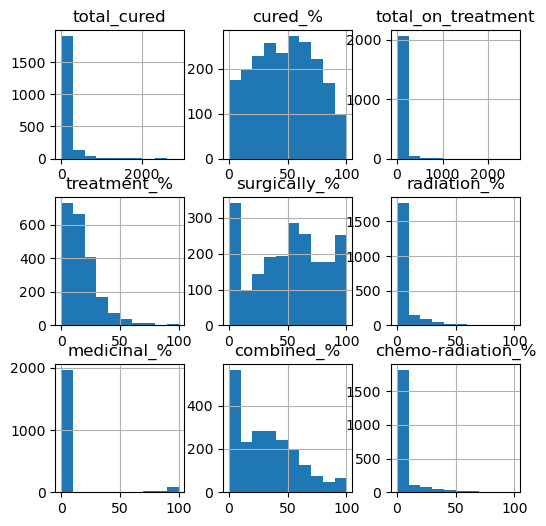

In [32]:
#посмотрим общую информацию по данным
data.info()
data.hist(figsize=(6,6))
plt.show()

**Вывод:** Данные обработаны корректно, пропусков нет, типы данных тоже верные. Из гистограмм видно, что разброс данных по столбцам total_cured и total_on_treatment большой, но это обосновано серьезными различиями регионов по количеству населения. Аномалий в данных нет. 

In [11]:
#создадим 2ой список с 2мя типовыми файлами
files_age = ['C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_059_Состояние_онко_помощи_в_РФ.xlsx',
 'C:\\Users\\Yulia\\Desktop\\Yandex Practicum\\Мастерская\\Мед дашборд\\данные\\2021_Таблица_060_Состояние_онко_помощи_в_РФ.xlsx']

In [12]:
#загрузим файлы
dfs_age = []
for i in range(len(files_age)):
    df = pd.read_excel(files_age[i])
    dfs_age.append(df)

In [34]:
#обработаем файлы
data_age=[]
for i in range(len(dfs_age)):
    df = dfs_age[i].iloc[2:].reset_index(drop=True)
    df.columns=['region', 'total_cured', 'cured_%', 'total_on_treatment', 'treatment_%', 'surgically_%', 'radiation_%', 'medicinal_%', 'combined_%', 'chemo-radiation_%']
    df.insert(0,'district','')
    df['district'] = df['region'].apply(district)
    df = df.query('region != @dist').reset_index(drop=True) 
    df[['total_cured', 'cured_%', 'total_on_treatment', 'treatment_%', 'surgically_%', 'radiation_%', 'medicinal_%', 'combined_%', 'chemo-radiation_%']] = df[['total_cured', 'cured_%', 'total_on_treatment', 'treatment_%', 'surgically_%', 'radiation_%', 'medicinal_%', 'combined_%', 'chemo-radiation_%']].apply(pd.to_numeric)
    data_age.append(df)

In [35]:
#добавим столбец с локализацией ЗНО
data_age[0].insert(2, 'localization', 'У детей в возрасте 0-14 лет (С00-96)')

In [36]:
#добавим столбец с локализацией ЗНО
data_age[1].insert(2, 'localization', 'У детей в возрасте 0-17 лет (С00-96)')

In [37]:
#объединим файлы
data_age_all = pd.concat(data_age)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 82
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   district            166 non-null    object 
 1   region              166 non-null    object 
 2   localization        166 non-null    object 
 3   total_cured         166 non-null    int64  
 4   cured_%             166 non-null    float64
 5   total_on_treatment  166 non-null    int64  
 6   treatment_%         166 non-null    float64
 7   surgically_%        166 non-null    float64
 8   radiation_%         166 non-null    float64
 9   medicinal_%         166 non-null    float64
 10  combined_%          166 non-null    float64
 11  chemo-radiation_%   166 non-null    float64
dtypes: float64(7), int64(2), object(3)
memory usage: 16.9+ KB


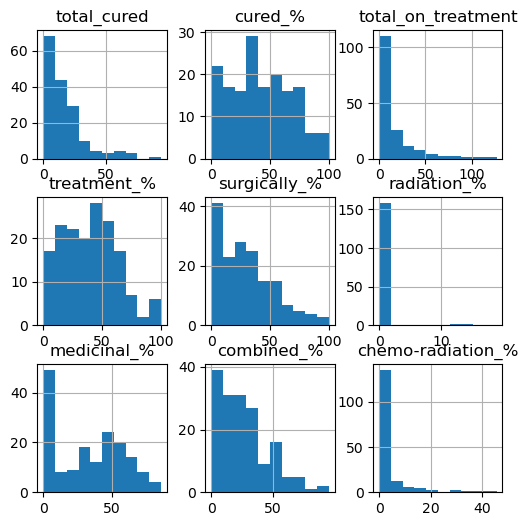

In [38]:
#посмотрим общую информацию по данным
data_age_all.info()
data_age_all.hist(figsize=(6,6))
plt.show()

**Вывод:** Данные обработаны корректно, пропусков нет, типы данных тоже верные. Исходя из гистограмм, ошибок в данных нет. 

In [67]:
#загрузим последную таблицу
data_add = pd.read_excel(path + "2021_Таблица_057_Состояние_онко_помощи_в_РФ.xlsx")

In [68]:
#удалим ненужные строки
data_add = data_add.iloc[4:].reset_index(drop=True)

In [69]:
#удалим ненужные столбцы
data_add = data_add.drop(columns=['Unnamed: 11', 'Unnamed: 13'])

In [70]:
#переименуем столбцы
data_add.columns=['region', 'total_refusal', 'refusal_%', 'refusal_stage_I/II', 'refusal_stage_%', 'total_contradic', 'contradic_%', 'contradic_stage_I/II', 'contradic_stage_%', 'total_ambulat', 'ambulat_%', 'med_hemobl', 'med_needed', 'med_received', 'med_%', 'redial_needed', 'radial_received', 'radial_%', 'combined_needed', 'combined_received', 'combined_%']

In [71]:
#поменяем порядок столбцов
data_add = data_add[['region', 'total_refusal', 'refusal_%', 'refusal_stage_I/II', 'refusal_stage_%', 'total_contradic', 'contradic_%', 'contradic_stage_I/II', 'contradic_stage_%', 'total_ambulat', 'ambulat_%', 'med_needed', 'med_received', 'med_hemobl', 'med_%', 'redial_needed', 'radial_received', 'radial_%', 'combined_needed', 'combined_received', 'combined_%']]

In [72]:
#создадим новый столбец district
data_add.insert(0,'district','')

In [73]:
#категоризируем данные регионов по ФО
data_add['district'] = data_add['region'].apply(district)

In [74]:
#удалим ненужные строки
data_add = data_add.query('region != @dist').reset_index(drop=True)

In [75]:
#поменяем тип данных
data_add[['total_refusal', 'refusal_%', 'refusal_stage_I/II', 'refusal_stage_%', 'total_contradic', 'contradic_%', 'contradic_stage_I/II', 'contradic_stage_%', 'total_ambulat', 'ambulat_%', 'med_needed', 'med_received', 'med_hemobl', 'med_%', 'redial_needed', 'radial_received', 'radial_%', 'combined_needed', 'combined_received', 'combined_%']] = data_add[['total_refusal', 'refusal_%', 'refusal_stage_I/II', 'refusal_stage_%', 'total_contradic', 'contradic_%', 'contradic_stage_I/II', 'contradic_stage_%', 'total_ambulat', 'ambulat_%', 'med_needed', 'med_received', 'med_hemobl', 'med_%', 'redial_needed', 'radial_received', 'radial_%', 'combined_needed', 'combined_received', 'combined_%']].apply(pd.to_numeric) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   district              85 non-null     object 
 1   region                85 non-null     object 
 2   total_refusal         85 non-null     int64  
 3   refusal_%             85 non-null     float64
 4   refusal_stage_I/II    85 non-null     int64  
 5   refusal_stage_%       85 non-null     float64
 6   total_contradic       85 non-null     int64  
 7   contradic_%           85 non-null     float64
 8   contradic_stage_I/II  85 non-null     int64  
 9   contradic_stage_%     85 non-null     float64
 10  total_ambulat         85 non-null     int64  
 11  ambulat_%             85 non-null     float64
 12  med_needed            85 non-null     int64  
 13  med_received          85 non-null     int64  
 14  med_hemobl            85 non-null     int64  
 15  med_%                 85 

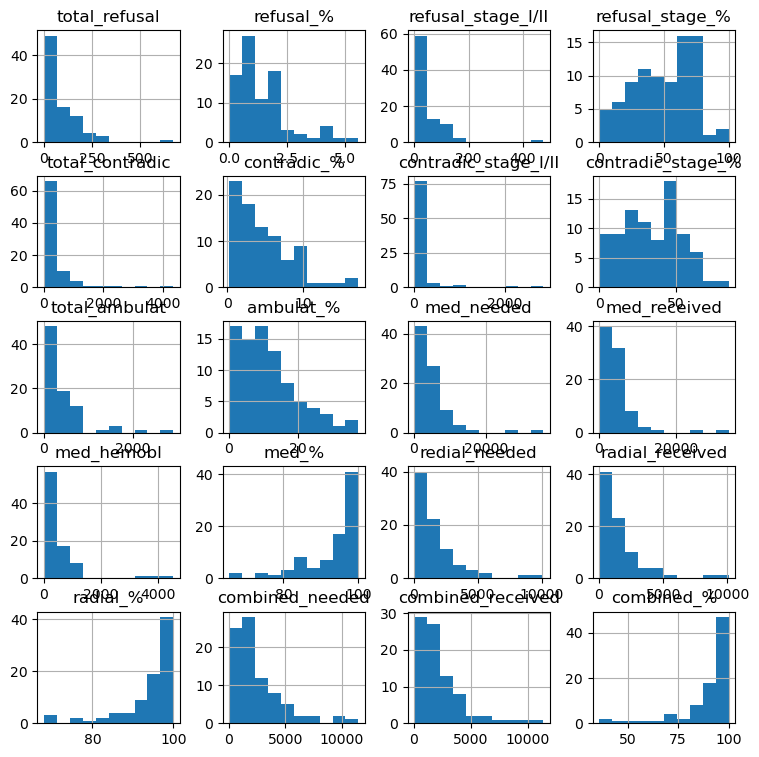

In [76]:
#посмотрим информацию по данным
data_add.info()
data_add.hist(figsize=(9,9))
plt.show()

**Вывод:** Данные обработаны корректно, пропусков нет, типы данных тоже верные. На гистограммах снова наблюдается большой разброс данных в столбцах с абсолютными значениями, но это также объясняется различиями регионов. Оснований считать, что в данных есть ошибки, нет. 

In [ ]:
#выгрузим данные для дальнейшей работы
data.to_csv('processed_data.csv',index=False, header=True)
data_age_all.to_csv('processed_data_age.csv',index=False, header=True)
data_add.to_csv('processed_data_add.csv',index=False, header=True)

## Выводы

1. Лидерами по доле ЗНО, радикальное лечение которых закончено, будет продолжено, не проводилось по причине отказа больного или противопоказаний, от числа ЗНО, зарегестрированных в 2021г., являются Республика Чечня (92,5%), Красноярский край (88,4%) и Республика Дагестан (87,6%). Аутсайдерами являются Республика Адыгея (47,8%), Омская (48,8%) и Калужская (49,5%) области.

2. Лидерами по числу больных с ЗНО, получивших лечение (закончено или будет продолжено), являются Республика Чечня (86,6%), Ленинградская область (85,6%) и Республика Дагестан (82,3%). Аутсайдерами являются Республика Адыгея (44,6%), Ненецкий а.о. (47,6%) и Омская область (48,1%). Это может говорить о меньшей доступности лечения в этих регионах. 

3. Лидерами по показателю завершенности радикального лечения в 2021г. являются следующие локализации ЗНО - Кожа (кроме меланомы) (85,6%), Щитовидная железа (80,2%) и Губа (75%). Аутсайдерами являются Печень и внутрипеченочные желчные протоки (11,2%), Поджелудочная железа (13,8%), Глотка (24,3%). Это указывает на недоступность лечения или о сложности лечения определенных локализаций ЗНО. 

4. Доля больных, лечение ЗНО которых проводилось только амбулаторно, выше всего в Еврейской авт. обл. (37,6%), Республике Алтай (35,7%) и Ульяновской обл. (32,8%), а ниже всего в Республике Саха (0%), Чукотском авт. окр. (0%) и Ркспублике Чечня (%). Такое лечение предусматривает существенное снижение затрат на лечение и является щадящими в отношении психоэмоционального состояния пациентов.

5. Среди методов лечения ЗНО хирургический является самым часто используемым. Чаще всего он используется при лечении почки, меланомы кожи и щитовидной железы. Комбинированный метод - 2ой по популярности и чаще всего применяется при лечении молочных желез, яичников и поджелудочной железы. Лучевой метод больше всего используется при лечении губы, кожи (кроме меланомы) и гортани. Лекарственный метод применяется исключительно при лечении лейкимии и злокачественной лимфомы. Химио-лучевой метод применяется при лечении глотки, щейки матки и пищевода. 

6. Показатели по числу больных с ЗНО, получивших лечение, у детей в целом на порядок выше, чем у взрослых. При лечении чаще всего применяется лекарственный метод.

7. Среди регионов с наименьшей долей отказов от лечения и противопоказаний к лечению у больных на I/II стадии находятся Ульяновская область, Респ. Карачаево-Черкесия и Республика Тыва. А регионами с наибольшей долей отказов от лечения и противопоказаний к лечению у больных на I-II стадии являются Астраханская область, г. Москва и Краснодарский край. Это может говорить о недоступности лечения или неблагоприятной социальной обстановке в этих регионах. 